# Create a plot of Idaho Confirmed COVID-19 Cases as of Yesterday

### 1. Load the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Get the range of dates and location of the data to munge

In [2]:
covid_daily_reports = 'csse_covid_19_data/csse_covid_19_daily_reports/'

day_shift=0

nState = 4

id_firstday = '3/13/2020'
co_firstday = '3/06/2020'
ut_firstday = '3/07/2020'
or_firstday = '2/29/2020'

today = pd.datetime.strftime(pd.datetime.now() - pd.Timedelta(days=day_shift), '%m-%d-%Y')

id_date_range = pd.date_range(start=id_firstday, end=today)
co_date_range = pd.date_range(start=co_firstday, end=today)
ut_date_range = pd.date_range(start=ut_firstday, end=today)
or_date_range = pd.date_range(start=or_firstday, end=today)


### 3. Create arrays for numbers of confirmed and recovered cases, and deaths

In [3]:
for state in np.arange(nState):
    if state == 0:
        date_range = id_date_range
        state_tag = "Idaho"
    elif state == 1:
        date_range = co_date_range
        state_tag = "Colorado"
    elif state == 2:
        date_range = ut_date_range
        state_tag = "Utah"
    elif state == 3:
        date_range = or_date_range
        state_tag = "Oregon"        

    day = 0

    confirmed = np.zeros((date_range.size,1))
    deaths    = np.zeros((date_range.size,1))
    recovered = np.zeros((date_range.size,1))
    active    = np.zeros((date_range.size,1))

    for date in date_range:
        
        covid_daily_data = pd.read_csv(covid_daily_reports+date.strftime('%m-%d-%Y') + '.csv')
        # Note the daily reports changed from 3/22/2020 onward such that the Province or State label was 
        # Provice_State rather than Province/State. Hence the branch below.
        if date <= pd.to_datetime('03-21-2020'):
            PS_label = "Province/State"
        elif date > pd.to_datetime('03-21-2020'):
            PS_label = "Province_State"

        covid_state_daily = covid_daily_data.loc[covid_daily_data[PS_label]==state_tag]
                
        confirmed[day] = covid_state_daily["Confirmed"].sum()
        deaths[day]    = covid_state_daily["Deaths"].sum()
        recovered[day] = covid_state_daily["Recovered"].sum()

        if(state == 1):
            confirmed[day] += covid_daily_data[covid_daily_data[PS_label].str.contains(', CO',na=False)]['Confirmed'].sum()
        elif(state == 2):
            confirmed[day] += covid_daily_data[covid_daily_data[PS_label].str.contains(', UT',na=False)]['Confirmed'].sum()
        elif(state == 3):
            confirmed[day] += covid_daily_data[covid_daily_data[PS_label].str.contains(', OR',na=False)]['Confirmed'].sum()
        
        day = day + 1        

    if state == 0:
        ID_confirmed = confirmed 
        ID_deaths    = deaths
        ID_recovered = recovered
    elif state == 1:
        CO_confirmed = confirmed
        CO_deaths    = deaths
        CO_recovered = recovered
    elif state == 2:
        UT_confirmed = confirmed
        UT_deaths    = deaths
        UT_recovered = recovered
    elif state == 3:
        OR_confirmed = confirmed
        OR_deaths    = deaths
        OR_recovered = recovered        

### 4. Create a plot of the time series of data and save it

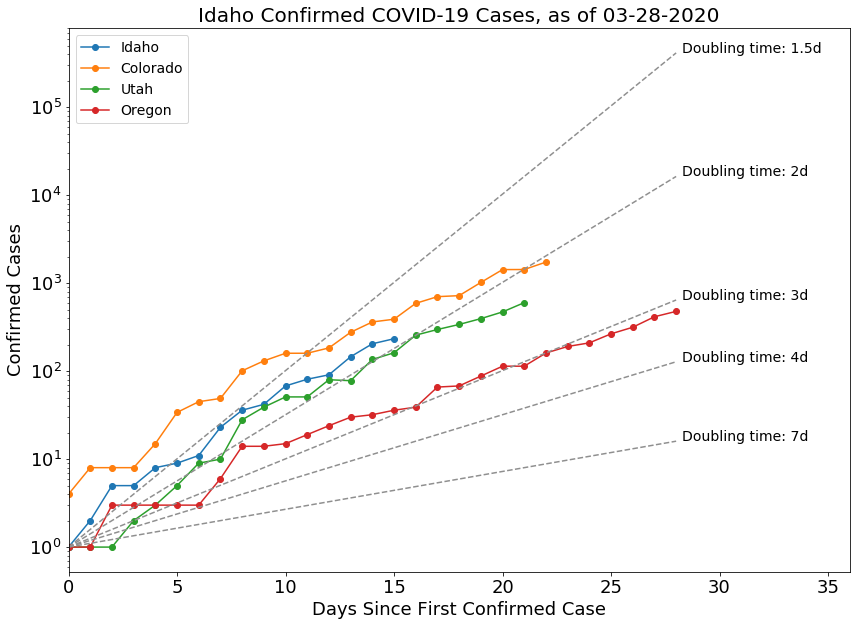

In [4]:
id_days_since_first = np.arange(id_date_range.size)
co_days_since_first = np.arange(co_date_range.size)
ut_days_since_first = np.arange(ut_date_range.size)
or_days_since_first = np.arange(or_date_range.size)

days_since_first = or_days_since_first

dt_1p5day = 2.0 ** (days_since_first / 1.5)
dt_2day = 2.0 ** (days_since_first / 2.0)
dt_3day = 2.0 ** (days_since_first / 3.0)
dt_4day = 2.0 ** (days_since_first / 4.0)
dt_7day = 2.0 ** (days_since_first / 7.0)

fig = plt.figure(figsize=(14,10))
plt.plot(id_days_since_first,ID_confirmed,'o-',label="Idaho")
plt.plot(co_days_since_first,CO_confirmed,'o-',label="Colorado")
plt.plot(ut_days_since_first,UT_confirmed,'o-',label="Utah")
plt.plot(or_days_since_first,OR_confirmed,'o-',label="Oregon")

plt.plot(days_since_first,dt_1p5day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_1p5day[-1],'Doubling time: 1.5d',fontsize=14)

plt.plot(days_since_first,dt_2day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_2day[-1],'Doubling time: 2d',fontsize=14)

plt.plot(days_since_first,dt_3day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_3day[-1],'Doubling time: 3d',fontsize=14)

plt.plot(days_since_first,dt_4day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_4day[-1],'Doubling time: 4d',fontsize=14)

plt.plot(days_since_first,dt_7day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_7day[-1],'Doubling time: 7d',fontsize=14)

plt.xlim((0,date_range.size+np.round(date_range.size/4.0)))

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper left',fontsize=14)
plt.title('Idaho Confirmed COVID-19 Cases, as of '+date_range[-1].strftime('%m-%d-%Y'),fontsize=20)
plt.xlabel('Days Since First Confirmed Case',fontsize=18)
plt.ylabel('Confirmed Cases',fontsize=18)
plt.yscale('log')

fig.savefig('ID-COVID-19_'+date_range[-1].strftime('%m-%d-%Y')+'.png', facecolor=fig.get_facecolor(), edgecolor='none')


In [5]:
OR_confirmed

array([[  1.],
       [  1.],
       [  3.],
       [  3.],
       [  3.],
       [  3.],
       [  3.],
       [  6.],
       [ 14.],
       [ 14.],
       [ 15.],
       [ 19.],
       [ 24.],
       [ 30.],
       [ 32.],
       [ 36.],
       [ 39.],
       [ 66.],
       [ 68.],
       [ 88.],
       [114.],
       [114.],
       [161.],
       [191.],
       [210.],
       [266.],
       [316.],
       [416.],
       [479.]])

In [6]:
ID_confirmed

array([[  1.],
       [  2.],
       [  5.],
       [  5.],
       [  8.],
       [  9.],
       [ 11.],
       [ 23.],
       [ 36.],
       [ 42.],
       [ 68.],
       [ 81.],
       [ 91.],
       [146.],
       [205.],
       [234.]])

In [7]:
UT_confirmed

array([[  1.],
       [  1.],
       [  1.],
       [  2.],
       [  3.],
       [  5.],
       [  9.],
       [ 10.],
       [ 28.],
       [ 39.],
       [ 51.],
       [ 51.],
       [ 80.],
       [ 78.],
       [136.],
       [162.],
       [257.],
       [298.],
       [340.],
       [396.],
       [472.],
       [602.]])

In [8]:
CO_confirmed

array([[   4.],
       [   8.],
       [   8.],
       [   8.],
       [  15.],
       [  34.],
       [  45.],
       [  49.],
       [ 101.],
       [ 131.],
       [ 160.],
       [ 160.],
       [ 184.],
       [ 277.],
       [ 363.],
       [ 390.],
       [ 591.],
       [ 704.],
       [ 723.],
       [1021.],
       [1430.],
       [1433.],
       [1740.]])